In [ ]:
import  pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSc Dissertation/diss.csv')
df.head()

,Review,Year
0,I have been shopping in Tesco for years. I hav...,2025
1,Purchased a Tesco Hearty Food Co Spaghetti Bol...,2025
2,Last shop ever at Tesco just do not trust the ...,2025
3,The app on my phone has stopped working althou...,2025
4,"Tesco store and cafe New Ollerton,terrible sto...",2025


In [ ]:
from collections import Counter
import re

# Clean the text to extract common words
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    return text

# Apply cleaning
df['clean_text'] = df['Review'].astype(str).apply(clean_text)

# Split all words into one list
all_words = ' '.join(df['clean_text']).split()

# Count word frequencies
word_freq = Counter(all_words)

# Get the top 50 most common words
top_words = word_freq.most_common(50)
top_words


[('the', 31560),
 ('to', 27826),
 ('i', 22405),
 ('and', 21790),
 ('a', 17086),
 ('of', 11911),
 ('tesco', 9907),
 ('in', 9776),
 ('for', 9295),
 ('was', 8954),
 ('my', 8371),
 ('is', 7757),
 ('it', 7578),
 ('have', 7439),
 ('not', 7359),
 ('they', 7276),
 ('that', 7049),
 ('on', 6885),
 ('this', 6056),
 ('you', 5975),
 ('with', 5944),
 ('at', 5637),
 ('be', 5188),
 ('as', 4892),
 ('are', 4720),
 ('no', 4634),
 ('me', 4630),
 ('but', 4508),
 ('had', 4230),
 ('so', 3977),
 ('delivery', 3343),
 ('from', 3260),
 ('customer', 3185),
 ('store', 3174),
 ('will', 3037),
 ('we', 3006),
 ('there', 2943),
 ('your', 2887),
 ('service', 2869),
 ('their', 2827),
 ('all', 2810),
 ('when', 2748),
 ('get', 2716),
 ('out', 2710),
 ('staff', 2592),
 ('them', 2512),
 ('if', 2486),
 ('just', 2480),
 ('shopping', 2476),
 ('or', 2475)]

In [ ]:
import pandas as pd

# Display full review text in outputs
pd.set_option('display.max_colwidth', None)

# Define the classification function
def get_issue(text):
    text = text.lower()

    # Delivery-related issues
    if any(word in text for word in [
        'delivery', 'missing', 'late', 'slot', 'driver', 'parcel',
        'order', 'not arrived', 'click and collect', 'click & collect',
        'click & collect order', 'collect slot', 'no delivery'
    ]):
        return 'Delivery Problem'

    # Billing, pricing, promotions, financial complaints
    elif any(word in text for word in [
        'refund', 'charged', 'charge', 'payment', 'card', 'bill', 'cashless',
        'loan', 'credit', 'debit', 'clubcard', 'clubcard points', 'price',
        'expensive', 'rip off', 'discount missing', 'no discount',
        'voucher not working', 'false offer', 'overcharged', 'receipt wrong',
        'scam price', 'profiteering'
    ]):
        return 'Billing/Payment'

    # App or technical issues – now includes install/uninstall and flexible phrasing
    elif any(phrase in text for phrase in [
        'app not working', 'app isn’t working', 'app isn\'t working', 'app is down',
        'app has stopped working', 'app stopped working', 'app on my phone has stopped working',
        'app on my phone stopped working', 'app crashed', 'app keeps crashing',
        'app won’t open', 'app wont open', 'app doesn’t open', 'app does not open',
        'cannot login', 'can’t login', 'cant login', 'unable to login', 'login failed',
        'technical issue', 'technical problem', 'scanner not working', 'bug in app',
        'glitch', 'error message', 'error code', 'website not loading', 'website down',
        'barcode not working', 'issue with barcode', 'scan and go not working',
        'scan & go not working', 'scan and go failed', 'app froze', 'app freezing',
        'problem with app', 'crash', 'install', 'uninstall', 'reinstall',
        'installed the app', 're-install', 'uninstalled the app', 'reinstalled the app',
        'try reinstalling', 'tried reinstalling'
    ]):
        return 'App/Tech Issue'

    # Advertising, political messaging, misleading marketing
    elif any(word in text for word in [
        'advert', 'advertising', 'christmas ad', 'xmas', 'marketing', 'vaccine',
        'covid advert', 'media', 'propaganda', 'scam', 'promo', 'voucher', 'boycott',
        'supporting farmers', 'brand', 'misleading ad', 'clubcard trick',
        'false advertising', 'tv advert', 'political message', 'greenwashing'
    ]):
        return 'Advertising/Marketing Issue'

    # Staff behavior and in-store experience
    elif any(word in text for word in [
        'staff', 'manager', 'attitude', 'rude', 'employee', 'unprofessional', 'policy',
        'mask', 'rules', 'enforce', 'security', 'abused', 'disability', 'autism',
        'verbal', 'racist', 'harassed', 'touched', 'parking ticket', 'hygiene'
    ]):
        return 'Staff Interaction'

    # Customer service and call centre complaints
    elif any(word in text for word in [
        'customer service', 'customer services', 'support', 'helpline', 'complaint', 'representative', 'ignored',
        'call centre', 'hung up', 'couldn’t reach', 'couldnt reach', 'awful customer service', 'phone down',
        'unreachable', 'no answer'
    ]):
        return 'Customer Service'

    # Queues, waiting time, checkout delays
    elif any(word in text for word in [
        'queue', 'waiting', 'line', 'long wait', 'checkout', 'delay', 'till'
    ]):
        return 'Waiting Time'

    # Quality or safety of food or product
    elif any(word in text for word in [
        'expired', 'damaged', 'wrong item', 'quality', 'quality of food', 'stale', 'mould', 'packaging',
        'rotten', 'burnt', 'bland', 'rubbery', 'tasteless', 'no filling', 'disgusting',
        'awful taste', 'inedible', 'went in the bin', 'wouldn’t eat', 'wouldnt eat',
        'dry', 'tough meat', 'hard beans', 'old oil', 'smelled bad',
        'pilling', 'material quality', 'poor quality', 'fabric issue',
        'clothing quality', 'clothes wear out'
    ]):
        return 'Product Quality'

    # Fuel-related complaints
    elif any(word in text for word in [
        'petrol', 'fuel', 'esso'
    ]):
        return 'Fuel Station'

    # Catch-all
    else:
        return 'Other'

# Load your data (replace this with your actual file if needed)
# df = pd.read_csv('your_reviews_file.csv')

# Ensure 'Review' column is string type
df['Review'] = df['Review'].astype(str)

# Apply classification
df['issue'] = df['Review'].apply(get_issue)

# View random samples
df[['Review', 'issue']].sample(10)


,Review,issue
5786,"Bad advert , and why can I only get deals if I sign up to your card ? I will be shopping else where from now.",Billing/Payment
7704,Now that the stricter COVID regs are in force I will try shopping at my local Tesco again next week.During the crisis they have thus far acquitted themselves appallingly.What use is a grinning employee stationed at the door who does say a word to anyone strolling in without a face mask?And will the half or dozen or so employees who stroll around the place with an arrogant insistence that they are not going to wear mask now be made to wear one?,Staff Interaction
4751,"Their online app is being made unusable and TEsco do not care!First was basket order messed up, they said would feed back! Years later nothing done!They did delivery times on the day, which has not worked for months now!Now favourites are a total mess and not in category order anymore. Awful! Tesco’s response..... we will feed it back, we have new ordering system.... SO TESCO, your new system in the warehouse has frozen veg, next to diet coke and bread? Tesco’s response.... go into each category and look through every item. OR do as I did.... cancel order and went to Morrisons and Lidl instead! Will be shopping there, until they fix favourites, which if look at their history, will be never!LOOK at the reviews on app Tesco, everyone HATES this! And the website is so slow to use, quicker to go shopping! YOUR LOSS tesco!",Delivery Problem
1930,I stopped shopping at Tesco online as every week the delivery got later and later than the booked time it got as bad as 5 hours one week I still had a delivery saver so thought I would try again but on a different day and guess what it’s late !! They can not fulfil the deliveries and just worry about taking orders they can’t fulfil to line there pockets it’s an absolute joke Tesco !!,Delivery Problem
8734,"My 78-year-old mother is a regular shopper with Tesco, and because of coronavirus is having to rely on home delivery. She is unable to get delivery slots. Why why why are Tesco not prioritising their loyal customers and indeed elderly customers especially, who are unable to get out and shop for themselves? I live down in England and my mother lives in Scotland, so I can’t help her. I tried calling Tesco, but there is no phone service service at the moment. Personally, I shop with Waitrose, and as a loyal customer, they give me priority slots online for click and collect service. I guess you get what you pay for. Tesco – shame on you!",Delivery Problem
4004,Utterly disgraceful treatment of loyal customers. I complained to the Contact Centre on 29th July. Having heard nothing from them I called and was put through to what I can only describe as an aggressive man. This was on 11th of August. I then emailed the complaints team copying in the CEO to date I have head nothin. I have given Tesco thousands of pounds over the years and I expect a decent amount of service and acknowledgment. I am away they are having problems with the system they brought in in May but someone needs to be accountable. It really is disgraceful.,Customer Service
1944,"Stopped by a ""I don't work for tesco"" security guard, who then rifled through my food to check what set off the gate. Then said it was my beef and go. Refused to deactivate the security tag, was rude and intimidating. No apologies, duty manager didn't want to know and gave me an email address to complain to who haven't responded!!",Staff Interaction
503,"Absolute rubbish - every week, they turn up with half the items ""no longer available"" or short dated so we're finished with Tesco Online once our delivery subscription runs out in November. An utter waste of time and money.",Delivery Problem
5303,Your advert scared the hell out of me! Your trying to normalise the use of a scan code amongst other thing! Not in the least done in a jovial way and well you know it! Hardly shopped there anyway so no great loss!,Advertising/Marketing Issue
3528,

In [ ]:
issue_counts = df['issue'].value_counts().reset_index()
issue_counts.columns = ['Issue Category', 'Count']
issue_counts

,Issue Category,Count
0,Delivery Problem,3176
1,Billing/Payment,1581
2,Advertising/Marketing Issue,1219
3,Staff Interaction,1174
4,Other,1162
5,Waiting Time,280
6,Customer Service,273
7,Product Quality,266
8,App/Tech Issue,22
9,Fuel Station,22


In [ ]:
df[df['issue'] == 'Other'][['Review']].head(10)


,Review
15,Tesco mobile costumer service is an absolute joke. Get more help talking to a brick wall
16,"Fed up with broken freezers, empty shelves and blocked isles with Warfield store. Freezers are constantly breaking down. Yesterday no free range chicken. Also since Tesco has down away with the deli, fish and meat counters you have to purchase prepacked forcing you to buy more than you need. Selection of fish very poor. Generally a poor run store."
38,how dare you bloody sausages change my pizza's pepperoni from 5 slices to 6 slices I have now got heart problems and will die in 6 years you bloody pelicans hope you go to the emergency room with a potato in your ass
43,It is two days after the date they told me I would receive my item and am told it will be a further 2-5 days until I receive it. Thus it will not arrive in time for my daughter’s birthday and I may be at work in the day it arrives now. Furious and very disappointed.
50,"AS usual,my review has been taken down.RE your Midsomer Norton store will you TURN THAT BLOODY MUSIC OFF.Its like a @@@@rock concert."
64,I bought 'Melting Middle 2 Smoked Haddock Fishcakes' from Tesco. We ate them for lunch but they tasted neither of fish nor cheese. We reviewed the ingredients. The haddock is listed twice: once as 26% and then as 14%. No idea what that means but we could find no chunks of fish in the smooth mashed potato filling. This product should be called 'Potato Croquettes Flavoured with Haddock'.
79,"As I type there are 64% 1 star reviews out of 16,357. So over 10,000 of these customers think they are AWFUL. I need say nothing else except that it's no wonder they don't respond to all their very many unhappy customers on Trustpilot, they simply wouldn't have the time!"
104,"Tesco Extra Prescot is a nightmare to shop in since they changed everything around and continue to do so. Also the huge number of pickers blocking up the aisles is a disgrace. I witnessed one picker, picking up numerous packs of apples and throwing them back down without any regard to the bruising she was causing to the apples which other customers would be buying. Unfortunately Tesco has blocked any other supermarket to open in the area so there is no competition to them in Prescot"
113,Normally very happy with Tesco products but wanted something quick and easy tonight for tea so got there pizza deal 1 pizza 1 side and a dip for £6 had the chicken bacon barbecue pizza I will say now it’s probably the worst pizza I’ve ever had tasted revolting the sides and the dip was fine but that’s all I could eat basically put the pizza in the bin
118,"Ive been buying tesco baked beans for two years, and now noticed three things, 1 : They are hard. Even after really heating them up, 2: they tastes like metal, and the can is in date 3: the taste is awful 😖 Looks like tesco, has gone to far with,( Every Little Helps )"


In [ ]:
issue_df = df['issue'].value_counts().reset_index()
issue_df.columns = ['Issue Category', 'Count']


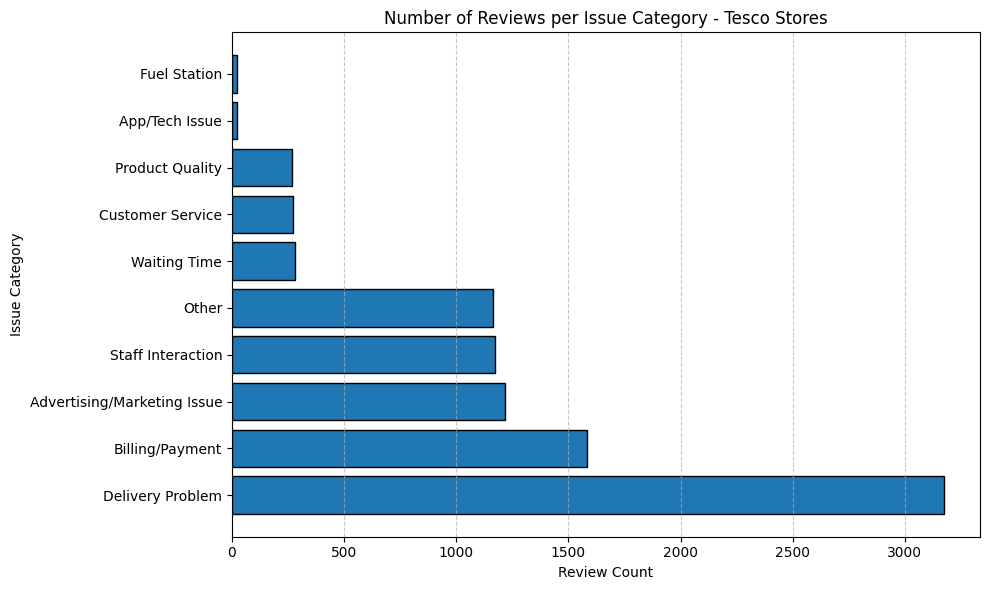

In [ ]:
import matplotlib.pyplot as plt

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(issue_df['Issue Category'], issue_df['Count'], edgecolor='black')
plt.title('Number of Reviews per Issue Category - Tesco Stores')
plt.xlabel('Review Count')
plt.ylabel('Issue Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df['year'] = pd.to_datetime(df['Year']).dt.year


In [ ]:
df['year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year


In [ ]:
issue_by_year = df.groupby(['year', 'issue']).size().unstack(fill_value=0)


In [ ]:
df['year'] = df['Year'].astype(int)


In [ ]:
df.head()

,Review,Year,clean_text,issue,year
0,I have been shopping in Tesco for years. I have to have my shopping delivered as I have a big family. Almost every time I get my shopping delivered there has been something missing that I have been charged for.This week was the last straw and I decided to write a review. I spent £200 a week with Tesco as I have 6 children. This week i was missing a £5 milk shake powder and £4 coffee mate. I want to stress this was not unavailable item or substitute I was charged. Ive decided to take my custom elsewhere. I just wish I did it soonerInstead of giving them the benefit of the doubt.Also the ready cooked whole chicken has come twice undercooked pink bloody. Ruined a few Sunday dinners,2025,i have been shopping in tesco for years i have to have my shopping delivered as i have a big family almost every time i get my shopping delivered there has been something missing that i have been charged forthis week was the last straw and i decided to write a review i spent a week with tesco as i have children this week i was missing a milk shake powder and coffee mate i want to stress this was not unavailable item or substitute i was charged ive decided to take my custom elsewhere i just wish i did it soonerinstead of giving them the benefit of the doubtalso the ready cooked whole chicken has come twice undercooked pink bloody ruined a few sunday dinners,Delivery Problem,2025
1,"Purchased a Tesco Hearty Food Co Spaghetti Bolognese took it out the microwave over a minute as stated on the packaging, used oven gloves it bent in the middle went all over the floor and 2 rugs.Most companies say put on a microwaveable plate. NOT TESCO.I am disabled so could only clear up the food, left a big stain and stains on the rug for my wife to clean up when she got home, took her 40 minutes.What did Tesco offer a paltry £0.85, complained and asked for a manager to phone me, they didnt bother.Made £2.9 billion in prodits, pathetic will never go again",2025,purchased a tesco hearty food co spaghetti bolognese took it out the microwave over a minute as stated on the packaging used oven gloves it bent in the middle went all over the floor and rugsmost companies say put on a microwaveable plate not tescoi am disabled so could only clear up the food left a big stain and stains on the rug for my wife to clean up when she got home took her minuteswhat did tesco offer a paltry complained and asked for a manager to phone me they didnt bothermade billion in prodits pathetic will never go again,Delivery Problem,2025
2,"Last shop ever at Tesco just do not trust the quality of food. The Chicken breast is harmful. ContainsTriphosphates• High-riskE451Texturizing agentProvides consistency, maintains or modifies the texture of the productThis additive contains phosphorus, a mineral whose current intake exceeds recommendations, and whose excess could disrupt bone mineralization, have a harmful effect on the kidneys, and increase the risk of cardiovascular diseases.",2025,last shop ever at tesco just do not trust the quality of food the chicken breast is harmful containstriphosphates highrisketexturizing agentprovides consistency maintains or modifies the texture of the productthis additive contains phosphorus a mineral whose current intake exceeds recommendations and whose excess could disrupt bone mineralization have a harmful effect on the kidneys and increase the risk of cardiovascular diseases,Billing/Payment,2025
3,The app on my phone has stopped working although nothing has changed. I tried uninstalling and installing again but no luck.Customers services couldn't help.,2025,the app on my phone has stopped working although nothing has changed i tried uninstalling and installing again but no luckcustomers services couldnt help,App/Tech Issue,2025
4,"Tesco store and cafe New Ollerton,terrible store for paying cash people are always queuing. Terrible cafe card only only fixed menu but good staff.Prices up smaller portions nearly 4 pounds for 

In [ ]:
issue_by_year = df.groupby(['year', 'issue']).size().unstack(fill_value=0)


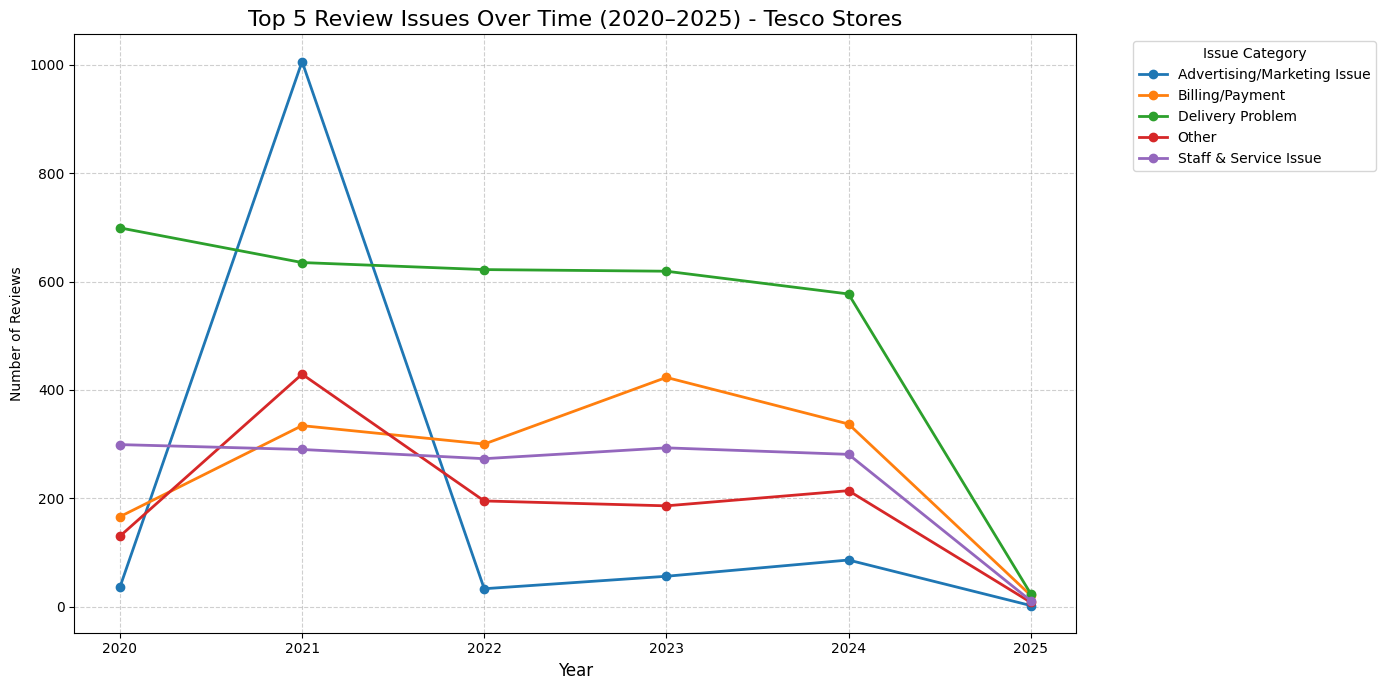

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Fix the year column
df['year'] = df['Year'].astype(int)

# STEP 2: Merge 'Staff Interaction' + 'Customer Service' into 'Staff & Service Issue'
df['issue'] = df['issue'].replace({
    'Staff Interaction': 'Staff & Service Issue',
    'Customer Service': 'Staff & Service Issue'
})

# STEP 3: Get top 5 issues (after merging)
top_5_issues = df['issue'].value_counts().nlargest(5).index

# STEP 4: Group data by year and issue (top 5 only)
issue_by_year_top5 = df[df['issue'].isin(top_5_issues)].groupby(['year', 'issue']).size().unstack(fill_value=0)

# STEP 5: Plot line chart
plt.figure(figsize=(14, 7))
for column in issue_by_year_top5.columns:
    plt.plot(issue_by_year_top5.index, issue_by_year_top5[column], marker='o', linewidth=2, label=column)

plt.title('Top 5 Review Issues Over Time (2020–2025) - Tesco Stores', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Issue Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(issue_by_year_top5.index)
plt.tight_layout()
plt.show()


In [ ]:
import  pandas as pd

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/MSc Dissertation/t_bank.csv')

In [ ]:
df2.head()

,Review,Date
0,"Eligibility check stated 90% acceptance which is the only reason I applied as I know it would result in a hard credit searchâ€¦This would have been to replace existing loan with higher interest and a credit card with higher interest. Combined a payment has never been missed and they are double the cost of the loan applied forâ€¦Loan declined as â€˜not affordableâ€™, this clearly isnâ€™t the case as it would have been 1/2 the payments I already make and have never missed.",2025
1,"I had a bond which mature 18th January but I havenâ€™t yet had my original capital returned yet. They keep it for a further 3 days, nice little earner for them!Every other time, with every other deposit taker, within a day or two I get closure details plus a certificate of interest paid. But not with Tesco, I have to ring again after 5th April and request that I am sent a certificate showing interest paid. What a complete shambles!",2025
2,"I received a letter to say my credit card balance was being increased, this did not happen. I called Tesco bank who said decision had been changed , they said a letter was sent , but it was not received by me . If a decision is made and a letter sent , it should be honoured ( just to be clear , I had not requested this .",2025
3,Credit score with Clear Score currently at 912Credit score with Experian currently at 889... Both very good scores.Never missed a payment with anything and still couldn't offer a loan..... why???Pathetic.,2025
4,"Absolutely appalling! I pay my bill on the date shown on the invoice and get charged late payment fees, I phone them as the mobile app doesn't recognise my details, really? who else is going to pay my bill? I get transferred to an adviser and spend 30 minuets setting up details of my already existing account and told I would not be charged a late payment fee, only to be called back to say I would be charged and it is all my fault?! Really, in my honest opinion I am swapping to a new card provider, Tesco is the worst I have ever used!!!",2025


In [ ]:
from collections import Counter
import re

# Step 1: Fix weird special characters
def fix_encoding(text):
    try:
        return text.encode('latin1').decode('utf-8')
    except:
        return text

# Step 2: Clean text – remove punctuation, lowercase, etc.
def clean_text(text):
    text = fix_encoding(text)  # Apply encoding fix first
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Remove punctuation
    return text.lower()  # Lowercase

# Apply both fixes to Tesco Bank reviews
df2['cleaned_review'] = df2['Review'].apply(clean_text)

# Combine all cleaned text into one big list of words
all_words = ' '.join(df2['cleaned_review']).split()

# Count word frequencies
word_freq = Counter(all_words)

# Get top 50 most common keywords
top_50_words = word_freq.most_common(50)
top_50_words


[('to', 13433),
 ('the', 12188),
 ('i', 10454),
 ('a', 8632),
 ('and', 8427),
 ('my', 5682),
 ('was', 4963),
 ('for', 4266),
 ('of', 3968),
 ('they', 3755),
 ('tesco', 3641),
 ('not', 3598),
 ('it', 3488),
 ('on', 3250),
 ('have', 3235),
 ('with', 3188),
 ('in', 3065),
 ('that', 2850),
 ('is', 2577),
 ('me', 2464),
 ('had', 2360),
 ('this', 2299),
 ('no', 2251),
 ('you', 2235),
 ('insurance', 2198),
 ('as', 2077),
 ('be', 1988),
 ('but', 1954),
 ('car', 1834),
 ('credit', 1571),
 ('bank', 1571),
 ('card', 1540),
 ('so', 1479),
 ('when', 1428),
 ('an', 1405),
 ('them', 1399),
 ('from', 1345),
 ('would', 1277),
 ('been', 1277),
 ('at', 1250),
 ('get', 1247),
 ('customer', 1180),
 ('time', 1104),
 ('by', 1079),
 ('are', 1069),
 ('out', 1069),
 ('service', 1052),
 ('very', 1046),
 ('will', 1036),
 ('policy', 1035)]

In [ ]:
# Refined Issue Classifier for Tesco Bank Reviews (with Staff and Wait Time handling)
def get_issue_bank(text):
    text = str(text).lower()

    # 💼 Savings & account access issues
    if any(word in text for word in [
        'savings', 'bond', 'maturity', 'withdraw', 'withdrawing money', 'account access',
        'form timeout', 'login questions', 'paperwork', 'certificate of interest'
    ]):
        return 'Savings/Account Access Issue'

    # 🧾 Insurance-related issues
    elif any(word in text for word in [
        'insurance', 'premium', 'vehicle', 'claim', 'policy', 'policies', 'cover',
        'car insurance', 'pet insurance', 'travel insurance'
    ]):
        return 'Insurance Claim Issue'

    # 💳 Credit card issues
    elif any(word in text for word in [
        'credit card', 'credit limit', 'balance transfer', 'credit file', 'credit rating', 'credit record', 'credit score',
        'card declined', 'interest rate', 'apr', 'late payment', 'charged interest', 'interest charge', 'early payment fee'
    ]):
        return 'Credit Card Issue'

    # 💰 Loan & affordability issues
    elif any(word in text for word in [
        'loan', 'declined', 'eligibility', 'affordability', 'loan application',
        'loan offer', 'slow application'
    ]):
        return 'Loan/Affordability Issue'

    # 🔐 Fraud/security concerns
    elif any(word in text for word in [
        'fraud', 'unauthorised', 'unauthorized', 'scam', 'security'
    ]):
        return 'Fraud/Security Issue'

    # ⚙️ App/technical issues
    elif any(word in text for word in [
        'app', 'login', 'technical issue', 'error', 'web', 'portal', 'site', 'log on', 'glitch', 'bug',
        'timeout', 'form timeout', 'clubcard pay', 'mobile signal', 'login process'
    ]):
        return 'App/Tech Issue'

    # 👥 Staff behaviour / professionalism
    elif any(word in text for word in [
        'rude', 'agent was rude', 'unprofessional', 'didn’t listen', 'wouldn’t listen',
        'hung up', 'manager refused', 'no knowledge', 'staff attitude', 'passed around',
        'agent didn’t help', 'staff not helpful', 'rep was rude'
    ]):
        return 'Staff Behaviour/Professionalism'

    # ☎️ Customer service / communication issues (includes wait time complaints)
    elif any(word in text for word in [
        'customer service', 'support', 'call', 'e-mail address', 'phone', 'unreachable', 'the wait', 'helpdesk',
        'on hold', 'waited', 'waiting too long', 'long wait', 'no response', 'still waiting',
        'delayed response', 'couldn’t get through', 'no reply', 'awful service', 'ignored',
        'contacted', 'spoke to', 'emailed', 'communication', 'no answer', 'ombudsman'
    ]):
        return 'Customer Service'

    # ❔ Fallback
    else:
        return 'Other'


# 👉 Ensure 'Review' column is string type
df2['Review'] = df2['Review'].astype(str)

# 🔍 Apply classifier to reviews
df2['refined_issue'] = df2['Review'].apply(get_issue_bank)

# 👀 Preview top 10 classified reviews
df2[['Review', 'refined_issue']].sample(10)


,Review,refined_issue
909,"I have just called to make my final payment of my Tesco Loan early. The app instructed me to call or fill in an early repayment form. I decided to call. Waited 15 minutes to get through. The phone answered and it was silent so I said Hello. I then got a female voice that said ""How can I help?"". No name or the company that I was phoning. So I asked who I was speaking to and she said Jacqueline. I had to give her my details twice then she said that I would need to request this online. I advised that the app says that I could phone. She then said that she wouldn't be able to assist, so I asked to speak to a manager. She then came back and said on this occasion she could do this over the phone. She was extremely off hand and unhelpful and I told her at the end of the call that I thought she was unhelpful. It is a shame after making 5yrs of payments and never paid my loan late that this is the disgraceful customer service that Tesco now provide. I hope this call was recorded as she clearly needs retrained in customer service.",Loan/Affordability Issue
4513,Had to wait a long time for an operative but problem was sorted quickly and efficiently,Other
4895,It took much to long to have my repair carried out,Other
495,"Absolute twisting and turning rob dogs. Pet insurance is a total waste of time. They say you only find out how good your insurance company is when you come to make a claim. I had the policy for nearly four years and never claimed on it once. Apparently, because my dog has had a mild ear infection in 2022 it was linked and therefore I cannot claim.Poor communication, hiding behind emails and failed to respond to promises of callbacks, I really would not bother and put your money in a pot instead of theirs. They will find a way not to pay.",Insurance Claim Issue
2247,"this service was like all others today,all want to use online options, but phone contact is always (we are having a high volume of calls at this time) this implies online contact is not helping ease work load.",Customer Service
2626,I have no opinion on this It was fine,Other
4946,"Tesco Bank car insuranceChanged to Tesco as it was way cheaper than my renewal from a different insurer. Had an accident 4 days ago. The claims process is ridiculous and long winded. Nobody has even contacted me yet, but a text about the repair garage that will be fixing my damage came through. When I called them it seems it is all done in stages over several weeks, and that my car won't even get in the garage til the end of September which is in 7 weeks. Never known anything like it. Will be cancelled as soon as this claim is sorted. You literally get what you pay for. Do not be tempted to change to them if they appear cheaper .",Insurance Claim Issue
150,"Wanted to open a savings account with 10,000 but you said no credit I donâ€™t want a credit account just saving ðŸ˜¡ðŸ˜¡",Savings/Account Access Issue
4001,You have to jump through hoops when you just want to go to Car Insurance.,Insurance Claim Issue
352,"Once I got through to a person all went exceedingly well, the staff member was very helpful and sorted to things out with aplomb. Your automated banking service, on line options, and choices menu are difficult to negotiate and time consuming. Your telephone number and e mail address is very well hidden, so you end up in a continuous loop, no doubt as it is designed to do. Overall Tesco works well, just that you have been seduced by the idea of AI and automated processes above engaging genuine customer service. If you did offer a more personal customer service it may stand you out from the crowd. I will remain a customer of Tesco in the hope that the balance between profit and customer satisfaction is restored a little in the coming years. Your Club Card scheme was your flagship, but like many companies it has been watered down to just mediocre, the old motto, if it's not broken don't fix it, comes to mind. Brian",Customer Service


In [ ]:
issue_counts = df2['refined_issue'].value_counts().reset_index()
issue_counts.columns = ['Bank Issue Category', 'Count']
issue_counts

,Bank Issue Category,Count
0,Insurance Claim Issue,2013
1,Other,1305
2,Credit Card Issue,964
3,Customer Service,649
4,App/Tech Issue,620
5,Loan/Affordability Issue,416
6,Savings/Account Access Issue,200
7,Fraud/Security Issue,160
8,Staff Behaviour/Professionalism,46


In [ ]:
df2[df2['refined_issue'] == 'Other'][['Review']].sample(40)

,Review
2202,Had to work hard to get a 60% increase down to 40% increase!
4895,It took much to long to have my repair carried out
977,They don't think or give you an option to explain what situation a person may be in
20,The scope of the questions was far too narrow.
353,Improve on your digital system
4095,Was trying to add a 2nd car after recently switching one car to Tesco. Price made my eyes water. Very inconsistent.
2538,"Tried to transfer money, and rejected it, although there was money in the donor account."
2626,I have no opinion on this It was fine
2501,Ok thenks tesco bank
3693,Read the answers that I twice gave in the survey !!


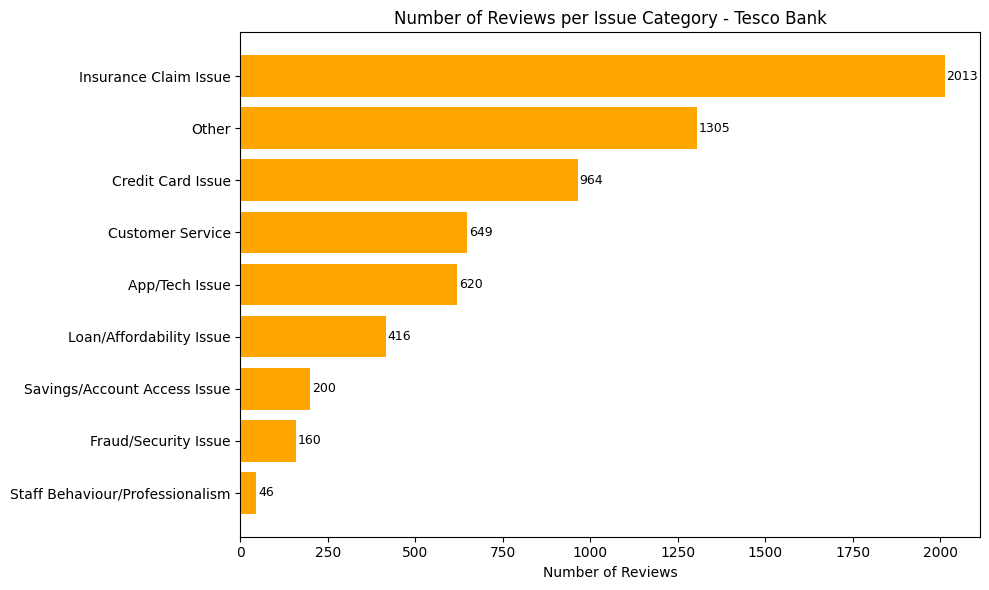

In [ ]:
import matplotlib.pyplot as plt

# 🔢 Count issue categories
issue_counts = df2['refined_issue'].value_counts().reset_index()
issue_counts.columns = ['Issue Category', 'Count']

# 📊 Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(issue_counts['Issue Category'], issue_counts['Count'], color='orange')
plt.xlabel('Number of Reviews')
plt.title('Number of Reviews per Issue Category - Tesco Bank')
plt.gca().invert_yaxis()  # Show most common on top

# 🔢 Add count labels
for i, (category, count) in enumerate(zip(issue_counts['Issue Category'], issue_counts['Count'])):
    plt.text(count + 5, i, str(count), va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
df2['Date'].sample(10)


,Date
2810,2024
4776,2022
3104,2023
3804,2023
5367,2022
2723,2023
3846,2023
3876,2023
6116,2021
631,2024


In [ ]:
# Directly convert 'Date' to numeric year
df2['year'] = pd.to_numeric(df2['Date'], errors='coerce')
df2['year'].value_counts().sort_index()


,count
year,
2020,224
2021,467
2022,1223
2023,1628
2024,2747
2025,84


In [ ]:
df2.columns

Index(['Review', 'Date', 'cleaned_review', 'refined_issue', 'year'], dtype='object')

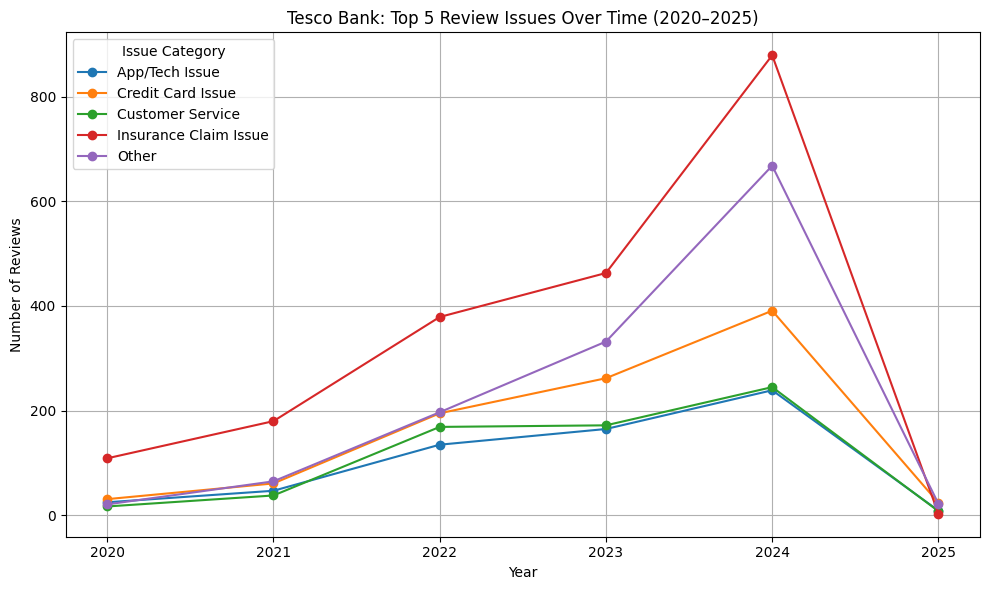

In [ ]:
import matplotlib.pyplot as plt

# Filter for valid years
df_trend = df2[(df2['year'] >= 2020) & (df2['year'] <= 2025)]

# Get top 5 issue categories
top_issues = df_trend['refined_issue'].value_counts().nlargest(5).index

# Filter only those issues
df_trend = df_trend[df_trend['refined_issue'].isin(top_issues)]

# Group by year and issue category
issue_trend = df_trend.groupby(['year', 'refined_issue']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
for issue in issue_trend.columns:
    plt.plot(issue_trend.index, issue_trend[issue], marker='o', label=issue)

plt.title('Tesco Bank: Top 5 Review Issues Over Time (2020–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.legend(title='Issue Category')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize and relabel issues
df['issue'] = df['issue'].replace({'Customer Service': 'Staff & Service Issue'})
df['brand'] = 'Tesco Store'

df2['issue'] = df2['refined_issue']
df2['brand'] = 'Tesco Bank'

# Step 2: Filter for selected issues only
selected_issues_bank = ['Insurance Claim Issue', 'Credit Card Issue', 'Customer Service', 'App/Tech Issue']
selected_issues_store = ['Delivery Problem', 'Billing/Payment', 'Advertising/Marketing Issue', 'Staff & Service Issue']

df_filtered = df[df['issue'].isin(selected_issues_store)][['year', 'issue', 'brand']]
df2_filtered = df2[df2['issue'].isin(selected_issues_bank)][['year', 'issue', 'brand']]

# Step 3: Combine both
combined_df = pd.concat([df_filtered, df2_filtered], ignore_index=True)

# Step 4: Group and count
issue_trend_combined = (
    combined_df.groupby(['year', 'brand', 'issue'])
    .size()
    .reset_index(name='count')
)

# Step 5: Define more vibrant custom colors
custom_palette = {
    'Insurance Claim Issue': '#D7263D',
    'Credit Card Issue': '#F4A261',
    'Customer Service': '#2A9D8F',
    'App/Tech Issue': '#264653',
    'Delivery Problem': '#F72585',
    'Billing/Payment': '#FFB703',
    'Advertising/Marketing Issue': '#7209B7',
    'Staff & Service Issue': '#0077B6',
}

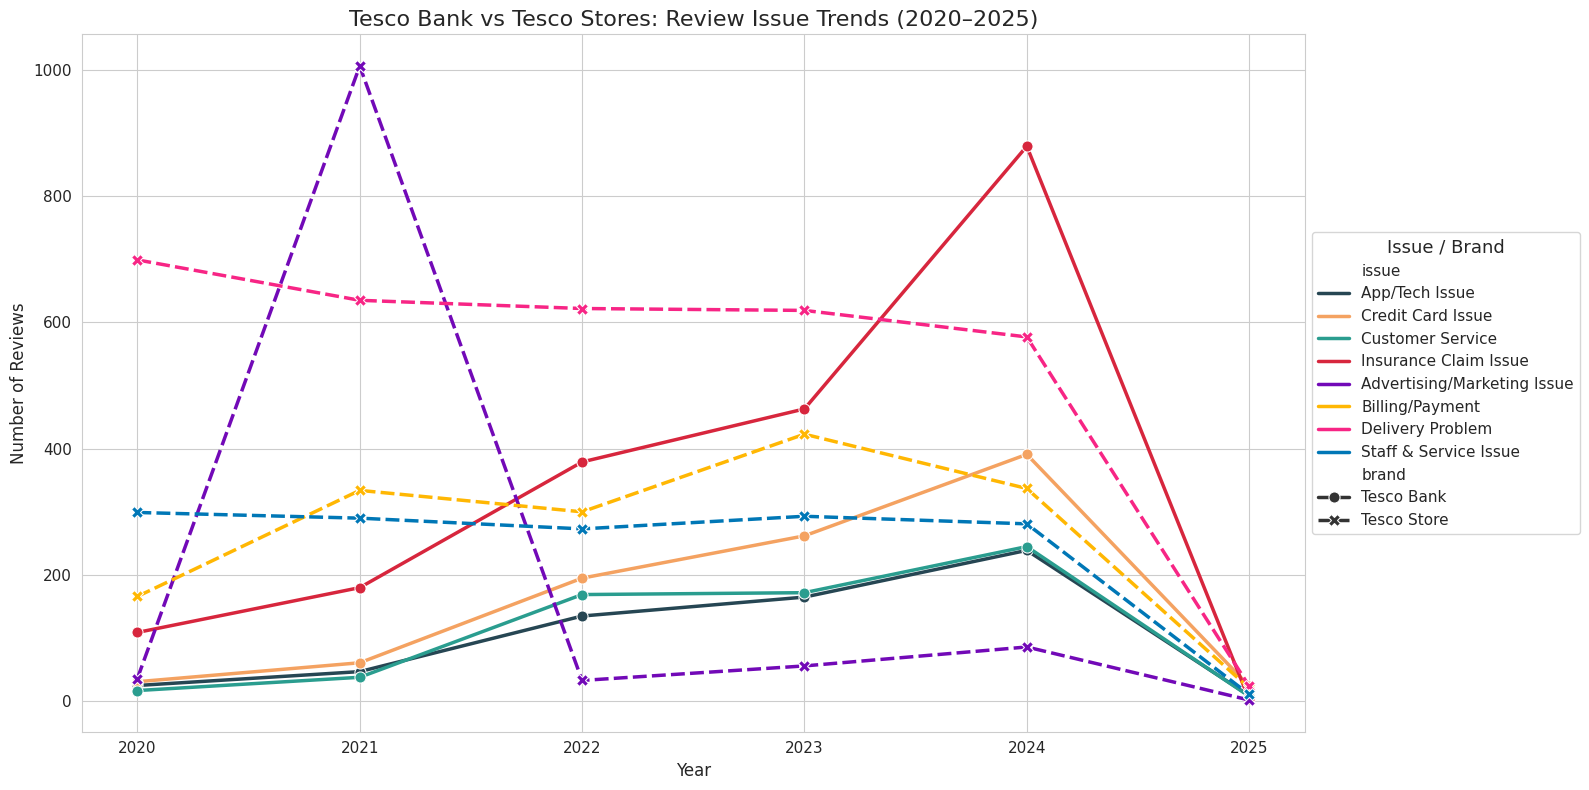

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

sns.lineplot(
    data=issue_trend_combined,
    x='year', y='count',
    hue='issue', style='brand',
    markers=True, dashes=True,
    palette=custom_palette,
    linewidth=2.5,
    markersize=8,
)

plt.title('Tesco Bank vs Tesco Stores: Review Issue Trends (2020–2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# ✅ Updated legend with capitalized section titles
handles, labels = plt.gca().get_legend_handles_labels()
from matplotlib.legend import Legend

plt.legend(
    handles=handles,
    labels=labels,
    title='Issue / Brand',
    title_fontsize=13,
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()
